In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm

In [13]:
def load_data():
    
    datasets = ["../input/intel-image-classification/seg_train/seg_train", "../input/intel-image-classification/seg_test/seg_test"]
    output = []
    image_size=(60,60)
    for dataset in datasets:
        images = []

        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):
            
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                images.append(image)

                
        images = np.array(images, dtype = 'float32')
   
        
        output.append(images)

    return output

def load_pred_images():
    path = "../input/intel-image-classification/seg_pred/seg_pred"
    image_size = (50, 50)
    images = []
    for file in tqdm(os.listdir(path)):
                
                img_path = os.path.join(path, file)
                
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                images.append(image)
    images = np.array(images, dtype = 'float32')
    
    return images

In [14]:
(train_images), (test_images) = load_data()

  1%|▏         | 31/2191 [00:00<00:07, 308.30it/s]

Loading ../input/intel-image-classification/seg_train/seg_train


  7%|▋         | 30/437 [00:00<00:01, 298.59it/s]

Loading ../input/intel-image-classification/seg_test/seg_test


100%|██████████| 501/501 [00:01<00:00, 336.05it/s]


In [15]:
print("shape of training images ",train_images.shape,"\n")
print("shape of test images ",test_images.shape,"\n")

shape of training images  (14034, 60, 60, 3) 

shape of test images  (3000, 60, 60, 3) 



In [16]:
train_images = shuffle(train_images, random_state=42)
test_images = shuffle(test_images, random_state=42)

In [17]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

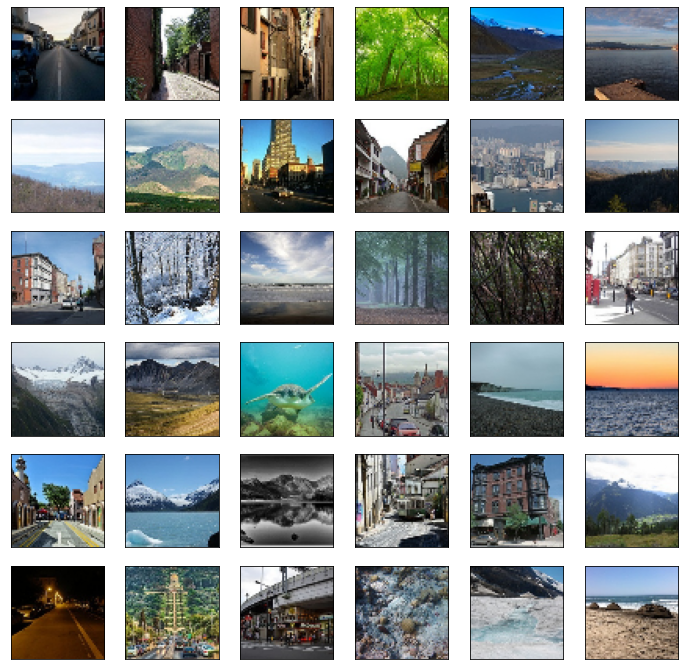

In [18]:
plt.figure(figsize=(12,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [19]:
train_images = train_images.reshape(len(train_images),-1)
test_images = test_images.reshape(len(test_images),-1)
print("\n")
print("shape of training images ",train_images.shape,"\n")
print("shape of test images ",test_images.shape,"\n")



shape of training images  (14034, 10800) 

shape of test images  (3000, 10800) 



## K-Means

In [20]:
from sklearn.cluster import KMeans

In [21]:
km=KMeans(n_clusters=6)
km.fit(train_images)
km.inertia_

6678303.5